In [1]:
# Imports 
import os
import sys
from io import StringIO
sys.path.append("..")
os.environ["pyna_language"] = 'julia'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# PHLD - VMAX
if False:
    # Load verification trajectory 
    nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')

    pyna_settings = pyna.load_settings(case_name='stca')
    pyna_settings.engine_file_name = "engine_deck_stca.csv"
    pyna_settings.TS_to = 1.
    pyna_settings.TS_vnrs = 0.475
    pyna_settings.TS_cutback = 0.475
    pyna_settings.z_cutback = 100.
    pyna_settings.save_results = True
    pyna_settings.levels_int_metric = 'ipnlt'
    pyna_settings.output_directory_name = 'PHLD/Vmax'
    pyna_settings.output_file_name = 'stca_phld_vmax.sql'

    pyna_settings.PTCB = False
    pyna_settings.PKROT = True
    pyna_settings.PHLD = True
    pyna_settings.shielding = False
    
    pyna_settings.all_sources = False
    pyna_settings.jet_mixing = True
    pyna_settings.core = True
    pyna_settings.fan_discharge = True
    pyna_settings.airframe = True
    
    # Simplifications
    pyna_settings.N_b = 1
    pyna_settings.n_segments_vnrs = 7
    pyna_settings.max_iter = 200
    pyna_settings.n_order = 3

    py = pyna(pyna_settings)
    py.ac.k_rot = 1.41

    if True:
        py.optimize_trajectory_noise(n_sideline=23, init_traj_name=None)

    if True:
        results = py.load_results(file_name='stca_phld_vmax.sql')

        path_save_name = 'Trajectory_stca_phld_vmax.csv'
        engine_save_name = 'engine_stca_phld_vmax.csv' 
        py.save_time_series(results, py.settings, py.ac, path_save_name, engine_save_name)
        
    if True:
        n_sl = 161

        py.settings.engine_file_name = 'engine_stca_phld_vmax.csv'
        py.settings.trajectory_file_name = 'Trajectory_stca_phld_vmax.csv'
        py.settings.output_file_name = 'stca_phld_vmax_noisetimeseries.sql'
        py.settings.observer_lst = ['contour',]
        py.settings.levels_int_metric = 'epnl'
    
        py.settings.all_sources = True
    
        x_observer_lst = np.zeros((n_sl+1, 3))
        x_observer_lst[:-1, 0] = np.linspace(1500, 5500, n_sl)
        x_observer_lst[:-1, 1] = 450*np.ones(n_sl)
        x_observer_lst[:, 2] = 4*0.3048*np.ones(n_sl+1)
        x_observer_lst[-1,0] = 6500.

        py.settings.x_observer_array = x_observer_lst
        py.compute_noise_time_series()

        epnl_sideline = py.problem.get_val('noise.epnl')[:-1]
        epnl_lateral = np.max(py.problem.get_val('noise.epnl')[:-1])
        epnl_flyover = py.problem.get_val('noise.epnl')[-1]

        np.save('../cases/stca/output/PHLD/Vmax/epnl_lateral_vmax.npy', epnl_lateral)
        np.save('../cases/stca/output/PHLD/Vmax/epnl_flyover_vmax.npy', epnl_flyover)
        np.save('../cases/stca/output/PHLD/Vmax/epnl_sideline_vmax.npy', epnl_sideline)       

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/utils/options_dictionary.py:332: OMDeprecationWarning:'gradient method' is not a valid python name and will become an invalid option name in a future release. You can prevent this warning (and future exceptions) by declaring this option using a valid python name.


--- Linkage Report [phases] ---
    --- groundroll - flapsdown ---
        time           [final] ==  time           [initial]
        states:x       [final] ==  states:x       [initial]
        states:v       [final] ==  states:v       [initial]
        states:alpha   [final] ==  states:alpha   [initial]
    --- flapsdown - rotation ---
        time           [final] ==  time           [initial]
        states:x       [final] ==  states:x       [initial]
        states:v       [final] ==  states:v       [initial]
        states:alpha   [final] ==  states:alpha   [initial]
    --- rotation - liftoff ---
        time               [final] ==  time             [initial]
        states:x           [final] ==  states:x         [initial]
        parameters:z       [final*] ==  states:z         [initial]
        states:v           [final] ==  states:v         [initial]
        states:alpha       [final] ==  controls:alpha   [initial]
        parameters:gamma   [final*] ==  states:gamma     [

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/stca/output/PHLD/Vmax/stca_phld_vmax.sql, is being overwritten.
/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.
Model viewer data has already has already been recorded for Driver.
Full total jacobian was computed 3 times, taking 6.093407 seconds.
Total jacobian shape: (290, 213) 


Jacobian shape: (290, 213)  ( 3.10% nonzero)
FWD solves: 11   REV solves: 0
Total colors vs. total size: 11 vs 213  (94.8% improvement)

Sparsity computed using tolerance: 1e-12
Time to compute sparsity: 6.093407 sec.
Time to compute coloring: 0.204271 sec.


Optimization Problem -- Optimization using pyOpt_sparse
    Objective Function: _objfunc

    Solution: 
--------------------------------------------------------------------------------
    Total Time:                   12.3280
       User Objective Time :       1.1270
       User Sensitivity Time :     9.7555
       Interface Time :            1.2962
       Opt Solver Time:            0.1494
    Calls to Objective Function :      30
    Calls to Sens Function :           30


   Objectives
     

--- Linkage Report [phases] ---
    --- groundroll - flapsdown ---
        time                     [final] ==  time                              [initial]
        states:x                 [final] ==  states:x                          [initial]
        states:v                 [final] ==  states:v                          [initial]
        states:alpha             [final] ==  states:alpha                      [initial]
        parameters:theta_flaps   [final*] ==  polynomial_controls:theta_flaps   [initial]
    --- flapsdown - rotation ---
        time                              [final] ==  time                     [initial]
        states:x                          [final] ==  states:x                 [initial]
        states:v                          [final] ==  states:v                 [initial]
        states:alpha                      [final] ==  states:alpha             [initial]
        polynomial_controls:theta_flaps   [final] ==  parameters:theta_flaps   [initial*]
    --- 

6500.1
6183.793731039163
6500.1
6183.902205235609
6500.1
6183.781926872707
6500.1
6183.749017595171
6500.1
6183.6226784008195
6500.1
6183.607665449483
6500.1
6183.4535280839145
6500.1
6183.360689571323
6500.1
6183.064197636292
6500.1
6183.0757841808345
6500.1
6183.075739459376
6500.1
6183.075741237477
6500.1
6183.075741260202
6500.1
6183.21247721927
6500.1
6183.28659179483
6500.1
6183.450462620969
6500.1
6183.451115394703
6500.1
6183.464193401409
6500.1
6183.237872584169
6500.1
6183.297545747704
6500.1
6183.373049233758
6500.1
6183.507797211812
6500.1
6183.507820917638
6500.1
6183.507820974925
6500.1
6183.440423137664
6500.1
6183.616798605658
6500.1
6183.616782412902
6500.1
6183.616782575274
6500.1
6183.528609500342
6500.1
6183.484515976072
6500.1
6184.388792184677
6500.1
6184.3886205892795
6500.1
6184.388629026901
6500.1
6183.936705314269
6500.1
6183.710623478046
6500.1
6183.597572938329
6500.1
6183.541045260399
6500.1
6183.512780819083
6500.1
6183.498648447795
6500.1
6183.49158222448

6500.1
6183.831506871693
6500.1
6183.831517632803
6500.1
6183.8315230133585
6500.1
6183.831525703636
6500.1
6183.831527048775
6500.1
6183.831527721343
6500.1
6183.831528057629
6500.1
6183.831528225771
6500.1
6183.669373503476
6500.1
6183.669365842805
6500.1
6183.750442718004
6500.1
6183.790983433962
6500.1
6183.811255320228
6500.1
6183.821391645571
6500.1
6183.82645990381
6500.1
6183.828994056826
6500.1
6183.830261139307
6500.1
6183.830894682042
6500.1
6183.831211453782
6500.1
6183.831369839745
6500.1
6183.83144903275
6500.1
6183.831488629259
6500.1
6183.831508427514
6500.1
6183.831518326643
6500.1
6183.831523276207
6500.1
6183.8315257509885
6500.1
6183.83152698838
6500.1
6183.831527607075
6500.1
6183.8315279164235
6500.1
6183.831528071098
6500.1
6183.831528148434
6500.1
6183.831528187103
6500.1
6183.831528206437
6500.1
6183.669372814982
6500.1
6183.669365152568
6500.1
6183.750442363638
6500.1
6183.790983246998
6500.1
6183.8112552170505
6500.1
6183.821391584307
6500.1
6183.826459863510

6500.1
6183.829347361319
6500.1
6183.829364292893
6500.1
6183.829372758681
6500.1
6183.829376991573
6500.1
6183.486107908438
6500.1
6183.4861196022875
6500.1
6183.657746225507
6500.1
6183.743562565035
6500.1
6183.786470019037
6500.1
6183.807923565691
6500.1
6183.818650293754
6500.1
6183.824013646447
6500.1
6183.826695319956
6500.1
6183.828036156001
6500.1
6183.828706573846
6500.1
6183.829041782724
6500.1
6183.829209387151
6500.1
6183.829293189364
6500.1
6183.829335090468
6500.1
6183.82935604102
6500.1
6183.829366516296
6500.1
6183.829371753935
6500.1
6183.829374372754
6500.1
6183.829375682164
6500.1
6183.829376336868
6500.1
6184.202528189062
6500.1
6184.189380414805
6500.1
6184.190785748451
6500.1
6184.016035582766
6500.1
6183.922726808734
6500.1
6183.876056787395
6500.1
6183.852717866075
6500.1
6183.841047427494
6500.1
6183.835211963691
6500.1
6183.832294170658
6500.1
6183.830835258857
6500.1
6183.830105799136
6500.1
6183.829741068321
6500.1
6183.829558702673
6500.1
6183.829467519791


/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/stca/dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.
Model viewer data has already has already been recorded for Driver.


In [2]:
# PTCB - V2
if True:
    # Load verification trajectory 
    nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')

    pyna_settings = pyna.load_settings(case_name='stca')
    pyna_settings.engine_file_name = "engine_deck_stca.csv"
    pyna_settings.TS_to = 1.
    pyna_settings.TS_vnrs = 0.56
    pyna_settings.TS_cutback = 0.56
    pyna_settings.z_cutback = 500.
    pyna_settings.save_results = True
    pyna_settings.levels_int_metric = 'epnl'
    pyna_settings.output_directory_name = 'PHLD/V2'
    pyna_settings.output_file_name = 'stca_phld_v2.sql'

    pyna_settings.PTCB = False
    pyna_settings.PKROT = True
    pyna_settings.PHLD = True
    pyna_settings.shielding = False

    # Simplifications
    pyna_settings.N_b = 1
    pyna_settings.n_segments_vnrs = 7
    pyna_settings.max_iter = 200
    pyna_settings.n_order = 3

    py = pyna(pyna_settings)
    py.ac.k_rot = 1.3
    py.ac.v_max = nasa_std['V [m/s]'].values[-1]

    if True:
        py.optimize_trajectory_noise(n_sideline=23, init_traj_name=None)

    if True:
        results = py.load_results(file_name='stca_phld_v2.sql')

        path_save_name = 'Trajectory_stca_phld_v2.csv'
        engine_save_name = 'engine_stca_phld_v2.csv' 
        py.save_time_series(results, py.settings, py.ac, path_save_name, engine_save_name)
        
    if True:
        n_sl = 161  

        py.settings.engine_file_name = 'engine_stca_phld_v2.csv'
        py.settings.trajectory_file_name = 'Trajectory_stca_phld_v2.csv'
        py.settings.output_file_name = 'stca_phld_v2_noisetimeseries.sql'
        py.settings.observer_lst = ['contour',]
        py.settings.levels_int_metric = 'epnl'

        py.settings.all_sources = True
        
        x_observer_lst = np.zeros((n_sl+1, 3))
        x_observer_lst[:-1, 0] = np.linspace(1500, 5500, n_sl)
        x_observer_lst[:-1, 1] = 450*np.ones(n_sl)
        x_observer_lst[:, 2] = 4*0.3048*np.ones(n_sl+1)
        x_observer_lst[-1,0] = 6500.

        py.settings.x_observer_array = x_observer_lst
        py.compute_noise_time_series()

        epnl_sideline = py.problem.get_val('noise.epnl')[:-1]
        epnl_lateral = np.max(py.problem.get_val('noise.epnl')[:-1])
        epnl_flyover = py.problem.get_val('noise.epnl')[-1]

    if True:
        np.save('../cases/stca/output/PHLD/V2/epnl_lateral_v2.npy', epnl_lateral)
        np.save('../cases/stca/output/PHLD/V2/epnl_flyover_v2.npy', epnl_flyover)
        np.save('../cases/stca/output/PHLD/V2/epnl_sideline_v2.npy', epnl_sideline)

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/utils/options_dictionary.py:332: OMDeprecationWarning:'gradient method' is not a valid python name and will become an invalid option name in a future release. You can prevent this warning (and future exceptions) by declaring this option using a valid python name.


--- Linkage Report [phases] ---
    --- groundroll - flapsdown ---
        time           [final] ==  time           [initial]
        states:x       [final] ==  states:x       [initial]
        states:v       [final] ==  states:v       [initial]
        states:alpha   [final] ==  states:alpha   [initial]
    --- flapsdown - rotation ---
        time           [final] ==  time           [initial]
        states:x       [final] ==  states:x       [initial]
        states:v       [final] ==  states:v       [initial]
        states:alpha   [final] ==  states:alpha   [initial]
    --- rotation - liftoff ---
        time               [final] ==  time             [initial]
        states:x           [final] ==  states:x         [initial]
        parameters:z       [final*] ==  states:z         [initial]
        states:v           [final] ==  states:v         [initial]
        states:alpha       [final] ==  controls:alpha   [initial]
        parameters:gamma   [final*] ==  states:gamma     [

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/stca/output/PHLD/V2/stca_phld_v2.sql, is being overwritten.
/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.
Model viewer data has already has already been recorded for Driver.
Full total jacobian was computed 3 times, taking 5.277394 seconds.
Total jacobian shape: (290, 213) 


Jacobian shape: (290, 213)  ( 3.10% nonzero)
FWD solves: 11   REV solves: 0
Total colors vs. total size: 11 vs 213  (94.8% improvement)

Sparsity computed using tolerance: 1e-12
Time to compute sparsity: 5.277394 sec.
Time to compute coloring: 0.189152 sec.


Optimization Problem -- Optimization using pyOpt_sparse
    Objective Function: _objfunc

    Solution: 
--------------------------------------------------------------------------------
    Total Time:                    9.0284
       User Objective Time :       0.8392
       User Sensitivity Time :     7.0733
       Interface Time :            0.9897
       Opt Solver Time:            0.1262
    Calls to Objective Function :      25
    Calls to Sens Function :           25


   Objectives
     

--- Linkage Report [phases] ---
    --- groundroll - flapsdown ---
        time                     [final] ==  time                              [initial]
        states:x                 [final] ==  states:x                          [initial]
        states:v                 [final] ==  states:v                          [initial]
        states:alpha             [final] ==  states:alpha                      [initial]
        parameters:theta_flaps   [final*] ==  polynomial_controls:theta_flaps   [initial]
    --- flapsdown - rotation ---
        time                              [final] ==  time                     [initial]
        states:x                          [final] ==  states:x                 [initial]
        states:v                          [final] ==  states:v                 [initial]
        states:alpha                      [final] ==  states:alpha             [initial]
        polynomial_controls:theta_flaps   [final] ==  parameters:theta_flaps   [initial*]
    --- 

Error: 

6500.1
6138.803848518336

+------------------------------------------------------------------------------+
| pyOptSparse Error: No constraint values were found for the constraint        |
| 'phases.phases.groundroll.collocation_constraint.defects:x'.                 |
+------------------------------------------------------------------------------+



Error: 

6500.1
6138.927405226872
6500.1
6137.832804046638
6500.1
6138.489267434128
6500.1
6140.260204007563
6500.1
6142.130996636129
6500.1
6141.519208681186
6500.1
6141.0867349968075
6500.1
6142.167519706835
6500.1
6142.125360552652
6500.1
6142.248385509115
6500.1
6142.183079654621
6500.1
6141.631458149799
6500.1
6139.09403061205
6500.1
6139.829166221029
6500.1
6138.1658884554045
6500.1
6139.529764677921
6500.1
6139.166307699808
6500.1
6138.954389254589
6500.1
6138.85226354901
6500.1
6138.377683863596
6500.1
6138.387063656495
6500.1
6138.413973796792
6500.1
6138.411132797854
6500.1
6138.41122575298
6500.1
6138.4112200723885
6500.1
6138.411222440015
6500.1
6138.400520856429
6500.1
6138.695155851489
6500.1
6139.183100107894
6500.1
6141.190587815636
6500.1
6141.021898609989
6500.1
6140.352832109873
6500.1
6141.1450361354555
6500.1
6140.186912862687
6500.1
6139.685023861584
6500.1
6139.434066347608
6500.1
6138.851138961249
6500.1
6138.917404999415
6500.1
6137.878708612503
6500.1
6138.94246679293


Error: 

6500.1
6137.581776215232
6500.1
6137.897152800895
6500.1
6138.1916055159445
6500.1
6137.570116917984
6500.1
6138.2838576571985
6500.1
6138.019068847886
6500.1
6138.229935846643
6500.1
6135.549416484058
6500.1
6138.111802564915
6500.1
6135.2374143502475
6500.1
6136.889644414117
6500.1
6137.559782228946
6500.1
6137.894857067027
6500.1
6137.530702293829
6500.1
6137.532122778588
6500.1
6137.431019783422
6500.1
6137.712779584085
6500.1
6137.636197511277
6500.1
6137.674488769586
6500.1
6136.88775161422
6500.1
6139.25987998593
6500.1
6128.420815473873
6500.1
6137.281196298885
6500.1
6137.477861518462
6500.1
6137.576179884752
6500.1
6137.625335511683
6500.1
6137.233364098996
6500.1
6137.207894585586
6500.1
6137.120363846483
6500.1
6136.787915217244
6500.1
6136.807933547799
6500.1
6138.125068259133
6500.1
6138.2419325005
6500.1
6138.249313779752
6500.1
6137.4665061902915
6500.1
6137.137221193374

+------------------------------------------------------------------------------+
| pyOptSparse Erro

Error: 

6500.1
6136.972577701997
6500.1
6136.903812139727
6500.1
6137.042416382039
6500.1
6137.437582011857
6500.1
6139.824996567693
6500.1
6139.391390192455
6500.1
6139.4525546382365
6500.1
6139.452658444301
6500.1
6139.452644396764
6500.1
6139.421972568871
6500.1
6142.121547104679
6500.1
6142.121999122393
6500.1
6142.122011642226
6500.1
6140.772118050008
6500.1
6140.674437283806
6500.1
6140.582510546686
6500.1
6140.4145082914
6500.1
6140.550407206254
6500.1
6140.552744276891
6500.1
6140.552767396109
6500.1
6140.552760939381
6500.1
6140.482754219733
6500.1
6141.686678025493
6500.1
6141.688716229974
6500.1
6141.688729925743
6500.1
6141.084817788596
6500.1
6140.783811497074
6500.1
6141.254650897459
6500.1
6140.848325430577
6500.1
6141.902226510833
6500.1
6142.495425707608
6500.1
6142.499375453369
6500.1
6142.746309664621
6500.1
6143.160137972693
6500.1
6142.143576767011
6500.1
6143.200104905267
6500.1
6142.954274057436
6500.1
6142.749097546481
6500.1
6142.818835958483
6500.1
6142.720055106287
6

Error: 

6500.1
6145.555189007871
6500.1
6146.150698092601
6500.1
6146.155949535709
6500.1
6146.156294122264
6500.1
6145.852975912699
6500.1
6145.978979994995
6500.1
6146.262606401227
6500.1
6145.962333358626
6500.1
6146.128059189028
6500.1
6146.141673479147
6500.1
6146.3071525140895
6500.1
6146.622590471494
6500.1
6147.0158752085845
6500.1
6147.317948944636
6500.1
6147.368058682488
6500.1
6147.1726436294775
6500.1
6147.173000388266
6500.1
6147.1730048702175
6500.1
6147.270353419559
6500.1
6147.4050522958205
6500.1
6147.416882612288
6500.1
6147.464422278903
6500.1
6147.460734840542
6500.1
6147.464685944754
6500.1
6147.486136335368
6500.1
6147.475411154846
6500.1
6147.470048553497
6500.1
6147.467367250049
6500.1
6147.466026597633
6500.1
6147.396930631528
6500.1
6147.39714910763
6500.1
6147.397148368027
6500.1
6147.431524271425
6500.1
6147.369539267641
6500.1
6146.322440910084
6500.1
6146.4291019790635
6500.1
6146.473728591668
6500.1
6146.526650447176
6500.1
6146.676799574092
6500.1
6146.80314872

6500.1
6146.914596787251
6500.1
6146.914596780905
6500.1
6146.947687697978
6500.1
6146.964235161275
6500.1
6146.972508891122
6500.1
6146.976645755595
6500.1
6146.978714187718
6500.1
6146.979748403752
6500.1
6146.980265511761
6500.1
6146.980524065764
6500.1
6146.980653342766
6500.1
6146.980717981267
6500.1
6146.980750300517
6500.1
6146.980766460142
6500.1
6146.980774539954
6500.1
6146.98077857986
6500.1
6146.300859085951
6500.1
6146.920884947961
6500.1
6146.300918899347
6500.1
6146.640819464369
6500.1
6146.810799179597
6500.1
6146.895788919051
6500.1
6146.93828375928
6500.1
6146.959531172026
6500.1
6146.970154876557
6500.1
6146.975466728362
6500.1
6146.978122654149
6500.1
6146.979450617015
6500.1
6146.98011459844
6500.1
6146.98044658915
6500.1
6146.980612584505
6500.1
6146.980695582182
6500.1
6146.980737081022
6500.1
6146.980757830441
6500.1
6146.9807682051505
6500.1
6146.980773392506
6500.1
6146.980775986183
6500.1
6146.980777283022
6500.1
6145.848776743649
6500.1
6146.959745047613
650

Error: 

6500.1
6146.143030125476
6500.1
6146.561911815807
6500.1
6146.771346170729
6500.1
6146.876061727153
6500.1
6146.928419100298
6500.1
6146.954597685626
6500.1
6146.967686952984
6500.1
6146.974231580335
6500.1
6146.977503892429
6500.1
6146.979140048082
6500.1
6146.979958125809
6500.1
6146.980367164647
6500.1
6146.98057168406
6500.1
6146.980673943766
6500.1
6146.980725073618
6500.1
6146.980750638544
6500.1
6146.980763421007
6500.1
6146.980769812238
6500.1
6146.980773007854
6500.1
6146.980774605662
6500.1
6146.980775404566
6500.1
6146.980775804017
6500.1
6146.980776003745
6500.1
6145.278967700614


RuntimeError: 'noise' <class JuliaExplicitComp>: Error calling compute(), <PyCall.jlwrap (in a Julia function called from Python)
JULIA: DomainError with pchip.xs[1] <= x must hold. Got
pchip.xs[1] => -2.5
x => -2.779588502620503:

Stacktrace:
 [1] macro expansion at /Users/laurensvoet/.julia/packages/ArgCheck/5xEDR/src/checks.jl:243 [inlined]
 [2] _pchip_index(::Interpolator{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Array{Float64,1},Array{Float64,1}}, ::Float64) at /Users/laurensvoet/.julia/packages/PCHIPInterpolation/x1m6e/src/PCHIPInterpolation.jl:240
 [3] Interpolator at /Users/laurensvoet/.julia/packages/PCHIPInterpolation/x1m6e/src/PCHIPInterpolation.jl:46 [inlined]
 [4] _broadcast_getindex_evalf at ./broadcast.jl:648 [inlined]
 [5] _broadcast_getindex at ./broadcast.jl:621 [inlined]
 [6] getindex at ./broadcast.jl:575 [inlined]
 [7] macro expansion at ./broadcast.jl:932 [inlined]
 [8] macro expansion at ./simdloop.jl:77 [inlined]
 [9] copyto! at ./broadcast.jl:931 [inlined]
 [10] copyto! at ./broadcast.jl:886 [inlined]
 [11] copy(::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2},Tuple{Base.OneTo{Int64},Base.OneTo{Int64}},Interpolator{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},Array{Float64,1},Array{Float64,1}},Tuple{Array{Float64,2}}}) at ./broadcast.jl:862
 [12] materialize at ./broadcast.jl:837 [inlined]
 [13] jet_shock(::PyObject, ::PyObject, ::PyObject, ::Int64, ::Dict{Any,Any}, ::Array{Float64,1}) at /Users/laurensvoet/Documents/Research/pyNA/pyNA/src/noise_src_jl/jet.jl:156
 [14] source(::PyObject, ::PyObject, ::PyObject, ::Array{Float64,2}, ::Int64, ::Dict{Any,Any}, ::Array{Float64,1}) at /Users/laurensvoet/Documents/Research/pyNA/pyNA/src/noise_src_jl/source.jl:37
 [15] (::var"#noise_model#12")(::PyObject, ::PyObject, ::PyObject, ::Int64, ::Dict{Any,Any}, ::Dict{Any,Any}, ::String, ::Array{Float64,1}) at /Users/laurensvoet/Documents/Research/pyNA/pyNA/src/noise_src_jl/noise_model.jl:317
 [16] compute!(::NoiseModel{PyObject,PyObject,PyObject,Int64,Dict{Any,Any},Dict{Any,Any},String,var"#noise_model#12",Array{Float64,1},Array{Float64,2},var"#11#13"{PyObject,PyObject,PyObject,Int64,Dict{Any,Any},Dict{Any,Any},String,var"#noise_model#12"},Int64}, ::PyDict{String,PyArray,true}, ::PyDict{String,PyArray,true}) at /Users/laurensvoet/Documents/Research/pyNA/pyNA/src/noise_src_jl/noise_model.jl:0
 [17] compute!(::Int64, ::PyDict{String,PyArray,true}, ::PyDict{String,PyArray,true}) at /Users/laurensvoet/Documents/Research/OpenMDAO.jl/src/OpenMDAO.jl:84
 [18] (::PyCall.FuncWrapper{Tuple{Integer,PyDict{String,PyArray,isdict} where isdict,PyDict{String,PyArray,isdict} where isdict},typeof(compute!)})(::Int64, ::Vararg{Any,N} where N; kws::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at /Users/laurensvoet/.julia/packages/PyCall/3fwVL/src/callback.jl:56
 [19] (::PyCall.FuncWrapper{Tuple{Integer,PyDict{String,PyArray,isdict} where isdict,PyDict{String,PyArray,isdict} where isdict},typeof(compute!)})(::Int64, ::Vararg{Any,N} where N) at /Users/laurensvoet/.julia/packages/PyCall/3fwVL/src/callback.jl:56
 [20] invokelatest(::Any, ::Any, ::Vararg{Any,N} where N; kwargs::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at ./essentials.jl:710
 [21] invokelatest(::Any, ::Any, ::Vararg{Any,N} where N) at ./essentials.jl:709
 [22] _pyjlwrap_call(::PyCall.FuncWrapper{Tuple{Integer,PyDict{String,PyArray,isdict} where isdict,PyDict{String,PyArray,isdict} where isdict},typeof(compute!)}, ::Ptr{PyCall.PyObject_struct}, ::Ptr{PyCall.PyObject_struct}) at /Users/laurensvoet/.julia/packages/PyCall/3fwVL/src/callback.jl:28
 [23] pyjlwrap_call(::Ptr{PyCall.PyObject_struct}, ::Ptr{PyCall.PyObject_struct}, ::Ptr{PyCall.PyObject_struct}) at /Users/laurensvoet/.julia/packages/PyCall/3fwVL/src/callback.jl:44>

In [13]:
py.ac.z_max

1300.0

In [2]:
# Load verification trajectory
nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')

pyna_settings = pyna.load_settings(case_name='stca')
pyna_settings.engine_file_name = "engine_deck_stca.csv"
pyna_settings.TS_cutback = 1.
pyna_settings.z_cutback = 500.
pyna_settings.save_results = True
pyna_settings.output_file_name = 'PHLD/optimize_krot/stca_phld.sql'
pyna_settings.theta_flaps = 10.
pyna_settings.max_iter = 100

pyna_settings.PHLD = True
pyna_settings.PKROT = False

py = pyna(pyna_settings)

In [5]:
py.compute_trajectory(objective='x_takeoff_x_end')

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/utils/options_dictionary.py:332: OMDeprecationWarning:'gradient method' is not a valid python name and will become an invalid option name in a future release. You can prevent this warning (and future exceptions) by declaring this option using a valid python name.


--- Linkage Report [phases] ---
    --- groundroll - flapsdown ---
        time                     [final] ==  time                              [initial]
        states:x                 [final] ==  states:x                          [initial]
        states:v                 [final] ==  states:v                          [initial]
        states:alpha             [final] ==  states:alpha                      [initial]
        parameters:theta_flaps   [final*] ==  polynomial_controls:theta_flaps   [initial]
    --- flapsdown - rotation ---
        time                              [final] ==  time                     [initial]
        states:x                          [final] ==  states:x                 [initial]
        states:v                          [final] ==  states:v                 [initial]
        states:alpha                      [final] ==  states:alpha             [initial]
        polynomial_controls:theta_flaps   [final] ==  parameters:theta_flaps   [initial*]
    --- 

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/stca/output//PHLD/optimize_krot/stca_phld.sql, is being overwritten.
/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.
Model viewer data has already has already been recorded for Driver.
Model viewer data has already has already been recorded for Driver.
Model viewer data has already has already been recorded for Driver.
Full total jacobian was computed 3 times, taking 5.246789 seconds.
Total jacobian shape: (363, 236) 


Jacobian shape: (363, 236)  ( 2.90% nonzero)
FWD solves: 12   REV solves: 0
Total colors vs. total size: 12 vs 236  (94.9% improvement)

Sparsity computed using tolerance: 1e-12
Time to compute sparsity: 5.246789 sec.
Time to compute coloring: 0.225701 sec.


Optimization Problem -- Optimization using pyOpt_sparse
    Objective Function: _objfunc

    Solution: 
--------------------------------------------------------------------------------
    Total Time:                   39.9258
       User Objective Time :       3.8968
       User Sensitivity Time :    30.7623
       Interface Time :            4.7743
       Opt 

False

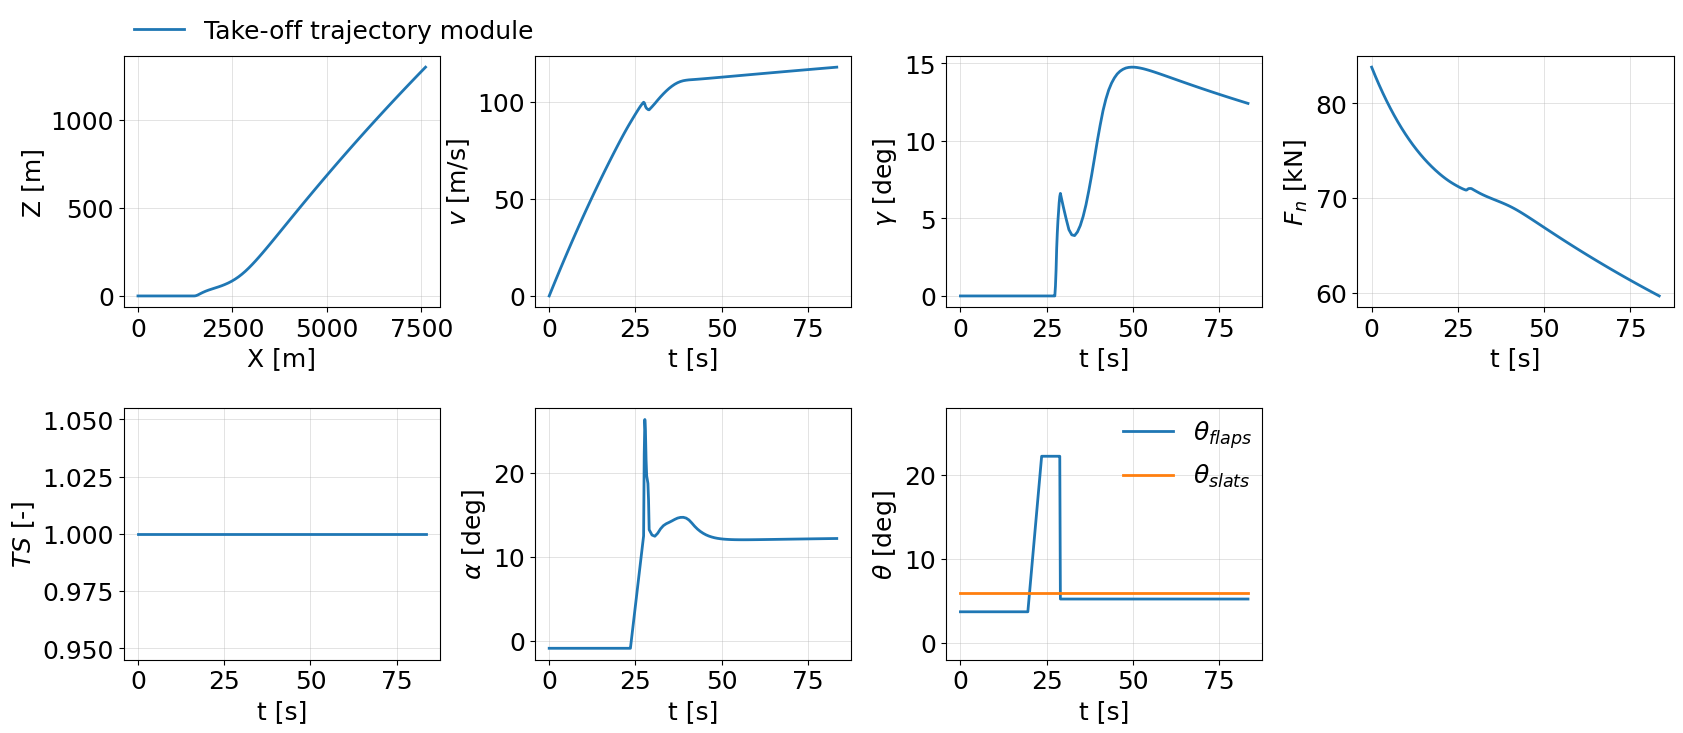

In [6]:
py.plot_trajectory(py.problem)

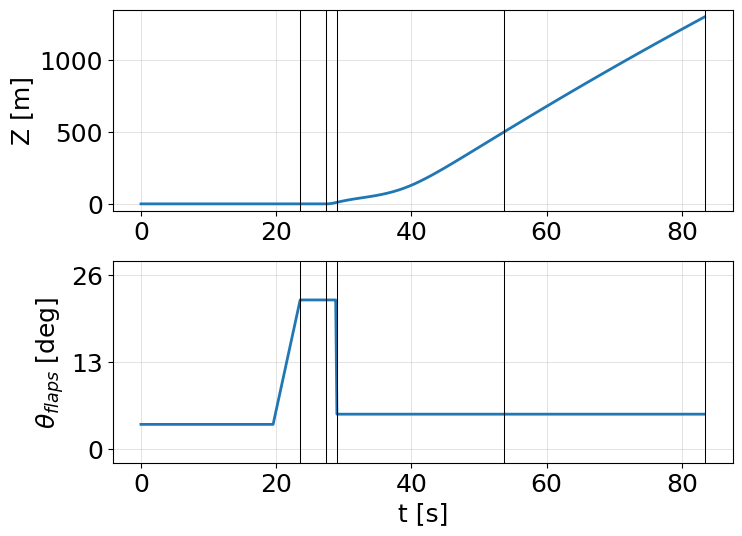

In [36]:
fig, ax = plt.subplots(2,1, figsize=(8,6))
plt.style.use('../utils/plot.mplstyle')
colors = ['tab:blue', 'tab:orange', 'tab:green']

ax[0].plot(py.problem.get_val('trajectory.t_s'), py.problem.get_val('trajectory.z'))
ax[0].set_ylabel(r'Z [m]')
ax[0].set_ylim([-50, 1350])

ax[1].plot(py.problem.get_val('trajectory.t_s'), py.problem.get_val('trajectory.theta_flaps'))
ax[1].set_ylim([-2, 28])
ax[1].set_yticks([0, 13, 26])
ax[1].set_xlabel(r't [s]')
ax[1].set_ylabel(r'$\theta_{flaps}$ [deg]')

for i in ['flapsdown', 'rotation', 'liftoff', 'vnrs', 'cutback']:
    t = py.problem.get_val('phases.'+i+'.time')[-1]
    
    ax[0].plot([t,t], [-50, 1350], 'k', linewidth=0.75)
    ax[1].plot([t,t], [-2, 28], 'k', linewidth=0.75)


plt.subplots_adjust(hspace=0.25)

In [ ]:
py.problem.get_val('trajectory.theta_flaps')

In [ ]:
krot = pd.read_csv('optimizer_output.csv').values

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(krot)
plt.ylabel('$k_{rot}$')
plt.xlabel('Objective function evaluation [-]')
plt.grid(True)
# plt.plot([0, 700], [1.41, 1.41])

In [ ]:
py.plot_optimizer_convergence_data('../cases/stca/output/IPOPT_trajectory_convergence.out')

In [ ]:
# Read optimizer convergence data 
file_name = '../cases/stca/output/IPOPT_trajectory_convergence.out'
myfile = open(file_name, 'rt')
data = 'iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls\n'

count = 0
while True:
    # Get next line from file
    line = myfile.readline()

    # if line is empty: end of file is reached
    if not line:
        break

    # Look for iteration number
    if str(count) in line[:4]:
        count = count + 1
        # Remove r from the iteration line
        for tag in ['f', 'F', 'h', 'H', 'k', 'K', 'n', 'N', 'R', 'w', 's', 't', 'T', 'r']:
            if tag in line:
                line = line.replace(tag, '')

        # Add line to data file
        data = data + line

# Close the file
myfile.close()

# Write the file in csv format and convert to pandas data frame
data = StringIO(data)
data = pd.read_csv(data, delim_whitespace=True)

In [ ]:
plt.plot(data['objective'].values)
plt.ylabel('Objective function')
plt.xlabel('Objective function evaluation [-]')
plt.grid(True)

In [ ]:
py.save_time_series(py.problem, py.settings, py.ac, 
                    'PHLD/varying_flaps/trajectory_stca_phld.csv', 
                    'PHLD/varying_flaps/engine_stca_phld.csv')

In [ ]:
# Compute trajectories for fixed flap settings 
n_theta = 14
theta_flaps_lst = np.linspace(0, 26, n_theta)
converged = np.zeros(n_theta)

if False:
    for i, pyna_settings.theta_flaps in enumerate(theta_flaps_lst):

        pyna_settings.save_results = True
        pyna_settings.output_file_name = 'PHLD/varying_flaps/stca_flaps_' + str(pyna_settings.theta_flaps) + 'deg.sql'

        py = pyna(pyna_settings)
        py.compute_trajectory(engine_mode='noise', control_optimization=False)

In [ ]:
# Load trajectories
results = dict()
for i, pyna_settings.theta_flaps in enumerate(theta_flaps_lst):
    results[str(pyna_settings.theta_flaps)] = py.load_results(file_name = 'PHLD/varying_flaps/stca_flaps_' + str(pyna_settings.theta_flaps) + 'deg.sql') 

In [ ]:
# Analyze trajectories 
r_min = np.zeros(n_theta)
x_end = np.zeros(n_theta)
x_takeoff = np.zeros(n_theta)
v_end = np.zeros(n_theta)
L_climb = np.zeros(n_theta)
D_climb = np.zeros(n_theta)
gamma_climb = np.zeros(n_theta)
alpha_climb = np.zeros(n_theta)
Fn_climb = np.zeros(n_theta)

for i, pyna_settings.theta_flaps in enumerate(theta_flaps_lst):
    x = results[str(pyna_settings.theta_flaps)].get_val('trajectory.x')
    y = results[str(pyna_settings.theta_flaps)].get_val('trajectory.y')
    z = results[str(pyna_settings.theta_flaps)].get_val('trajectory.z')
    x_obs = np.array([6500., 0., 4*0.3048])

    r_min[i] = np.min( np.sqrt((x-x_obs[0])**2+(y-x_obs[1])**2+(z-x_obs[2])**2) )
    
    x_takeoff[i] = results[str(pyna_settings.theta_flaps)].get_val('phases.climb.timeseries.states:x')[-1]
    
    x_end[i] = x[-1]
    v_end[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.v')[-1]
    
    L_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.L')[-1]
    D_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.D')[-1]

    gamma_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.gamma')[-1]
    
    alpha_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.alpha')[-1]
    
    Fn_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.F_n')[-1]

In [ ]:
# Plot trajectories
fig, ax = plt.subplots(4,2,figsize=(20,16))

ax[0,0].plot(results[str(4.0)].get_val('trajectory.t_s'), results[str(4.0)].get_val('trajectory.alpha'), linewidth=1)
ax[0,0].plot(results[str(6.0)].get_val('trajectory.t_s'), results[str(6.0)].get_val('trajectory.alpha'), linewidth=1)
ax[0,0].plot(results[str(10.0)].get_val('trajectory.t_s'), results[str(10.0)].get_val('trajectory.alpha'), linewidth=1)
ax[0,0].set_ylabel(r'$\alpha$')

ax[0,1].plot(results[str(4.0)].get_val('trajectory.t_s'), results[str(4.0)].get_val('trajectory.gamma'), linewidth=1)
ax[0,1].plot(results[str(6.0)].get_val('trajectory.t_s'), results[str(6.0)].get_val('trajectory.gamma'), linewidth=1)
ax[0,1].plot(results[str(10.0)].get_val('trajectory.t_s'), results[str(10.0)].get_val('trajectory.gamma'), linewidth=1)
ax[0,1].set_ylabel(r'$\gamma$')
ax[0,1].set_xlim([30,40])

ax[1,0].plot(results[str(4.0)].get_val('trajectory.t_s'), results[str(4.0)].get_val('trajectory.c_l'), linewidth=1)
ax[1,0].plot(results[str(6.0)].get_val('trajectory.t_s'), results[str(6.0)].get_val('trajectory.c_l'), linewidth=1)
ax[1,0].plot(results[str(10.0)].get_val('trajectory.t_s'), results[str(10.0)].get_val('trajectory.c_l'), linewidth=1)
ax[1,0].set_ylabel(r'$c_l$')

ax[1,1].plot(results[str(4.0)].get_val('trajectory.t_s'), results[str(4.0)].get_val('trajectory.c_d'), linewidth=1)
ax[1,1].plot(results[str(6.0)].get_val('trajectory.t_s'), results[str(6.0)].get_val('trajectory.c_d'), linewidth=1)
ax[1,1].plot(results[str(10.0)].get_val('trajectory.t_s'), results[str(10.0)].get_val('trajectory.c_d'), linewidth=1)
ax[1,1].set_ylabel(r'$c_d$')

ax[2,0].plot(results[str(4.0)].get_val('trajectory.t_s'), results[str(4.0)].get_val('trajectory.theta_flaps'), linewidth=1)
ax[2,0].plot(results[str(6.0)].get_val('trajectory.t_s'), results[str(6.0)].get_val('trajectory.theta_flaps'), linewidth=1)
ax[2,0].plot(results[str(10.0)].get_val('trajectory.t_s'), results[str(10.0)].get_val('trajectory.theta_flaps'), linewidth=1)
ax[2,0].set_ylabel(r'$\theta_{flaps}$')

ax[2,1].plot(results[str(4.0)].get_val('trajectory.t_s'), results[str(4.0)].get_val('trajectory.c_l')/results[str(4.0)].get_val('trajectory.c_d'), linewidth=1)
ax[2,1].plot(results[str(6.0)].get_val('trajectory.t_s'), results[str(6.0)].get_val('trajectory.c_l')/results[str(6.0)].get_val('trajectory.c_d'), linewidth=1)
ax[2,1].plot(results[str(10.0)].get_val('trajectory.t_s'), results[str(10.0)].get_val('trajectory.c_l')/results[str(10.0)].get_val('trajectory.c_d'), linewidth=1)
ax[2,1].set_ylabel(r'$L/D$')

ax[3,0].plot(results[str(4.0)].get_val('trajectory.t_s'), results[str(4.0)].get_val('trajectory.v'), linewidth=1)
ax[3,0].plot(results[str(6.0)].get_val('trajectory.t_s'), results[str(6.0)].get_val('trajectory.v'), linewidth=1)
ax[3,0].plot(results[str(10.0)].get_val('trajectory.t_s'), results[str(10.0)].get_val('trajectory.v'), linewidth=1)
ax[3,0].set_ylabel(r'$V$')
ax[3,0].set_xlim([30,40])
ax[3,0].set_ylim([110,130])

ax[3,1].plot(results[str(4.0)].get_val('trajectory.x'), results[str(4.0)].get_val('trajectory.z'), linewidth=1)
ax[3,1].plot(results[str(6.0)].get_val('trajectory.x'), results[str(6.0)].get_val('trajectory.z'),'--', linewidth=1)
ax[3,1].plot(results[str(10.0)].get_val('trajectory.x'), results[str(10.0)].get_val('trajectory.z'), linewidth=1)
ax[3,1].set_ylabel(r'$Z$')
ax[3,1].set_xlim([6000,7000])
ax[3,1].set_ylim([1000,1200])

In [ ]:
# Compute trajectories for fixed flap settings 
n_theta = 14
theta_flaps_lst = np.linspace(0, 26, n_theta)
converged = np.zeros(n_theta)

# for i, pyna_settings.theta_flaps in enumerate(theta_flaps_lst):

#     pyna_settings.save_results = True
#     pyna_settings.output_file_name = 'PHLD/stca_flaps_' + str(pyna_settings.theta_flaps) + 'deg.sql'

#     py = pyna(pyna_settings)
#     # py.compute_trajectory(control_optimization=True, objective='noise_surrogate')
#     py.compute_trajectory(engine_mode='noise', control_optimization=False)


In [ ]:
# Analyze trajectories 
r_min = np.zeros(n_theta)
x_end = np.zeros(n_theta)
x_takeoff = np.zeros(n_theta)
v_end = np.zeros(n_theta)
L_climb = np.zeros(n_theta)
D_climb = np.zeros(n_theta)
gamma_climb = np.zeros(n_theta)
alpha_climb = np.zeros(n_theta)
Fn_climb = np.zeros(n_theta)

for i, pyna_settings.theta_flaps in enumerate(theta_flaps_lst):
    x = results[str(pyna_settings.theta_flaps)].get_val('trajectory.x')
    y = results[str(pyna_settings.theta_flaps)].get_val('trajectory.y')
    z = results[str(pyna_settings.theta_flaps)].get_val('trajectory.z')
    x_obs = np.array([6500., 0., 4*0.3048])

    r_min[i] = np.min( np.sqrt((x-x_obs[0])**2+(y-x_obs[1])**2+(z-x_obs[2])**2) )
    
    x_takeoff[i] = results[str(pyna_settings.theta_flaps)].get_val('phases.climb.timeseries.states:x')[-1]
    
    x_end[i] = x[-1]
    v_end[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.v')[-1]
    
    L_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.L')[-1]
    D_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.D')[-1]

    gamma_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.gamma')[-1]
    
    alpha_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.alpha')[-1]
    
    Fn_climb[i] = results[str(pyna_settings.theta_flaps)].get_val('trajectory.F_n')[-1]

In [ ]:
# Comparison of constant flap trajectories with PHLD
print('Minimum take-off distance fixed HLD: ', np.round(np.min(x_takeoff),2), 'm')
print('Maximum flyover distance fixed HLD: ', np.round(np.max(r_min), 2), 'm')


x = py.problem.get_val('trajectory.x')
y = py.problem.get_val('trajectory.y')
z = py.problem.get_val('trajectory.z')
x_obs = np.array([6500., 0., 4*0.3048])

print('Take-off distance PHLD', np.round(py.problem.get_val('phases.climb.timeseries.states:x')[-1][0],2))
print('Flyover distance PHLD: ', np.round(np.min(np.sqrt((x-x_obs[0])**2+(y-x_obs[1])**2+(z-x_obs[2])**2)),2))

print('Take-off distance PHLD [%]', 100*(py.problem.get_val('phases.climb.timeseries.states:x')[-1][0]/np.min(x_takeoff)-1))
print('Flyover distance PHLD [%]: ', 100*(np.min(np.sqrt((x-x_obs[0])**2+(y-x_obs[1])**2+(z-x_obs[2])**2))/np.max(r_min)-1))



# Constant flap setting comparison

In [ ]:
# Load trajectories
results = dict()
theta_flaps_lst = np.linspace(0,26,27)
for i, pyna_settings.theta_flaps in enumerate(theta_flaps_lst):
    results[str(pyna_settings.theta_flaps)] = py.load_results(file_name = 'PHLD/constant_flaps/stca_flaps_' + str(pyna_settings.theta_flaps) + 'deg.sql') 
    
phld = py.load_results(file_name = 'PHLD/varying_flaps/stca_phld.sql') 

In [ ]:
def compare_trajectories(problems, names):

    fig, ax = plt.subplots(2, 3, figsize=(20,8))
    plt.style.use('../utils/plot.mplstyle')
    
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
    linestyles = ['-', '--', '-.']
    for i, p in enumerate(problems):
        ax[0,0].plot(p.get_val('trajectory.x'), p.get_val('trajectory.z'), label=names[i], linestyle=linestyles[i])
        ax[0,1].plot(p.get_val('trajectory.t_s'), p.get_val('trajectory.v'), linestyle=linestyles[i])
        ax[0,2].plot(p.get_val('trajectory.t_s'), p.get_val('trajectory.gamma'), linestyle=linestyles[i])
        
        ax[1,0].plot(p.get_val('trajectory.t_s'), p.get_val('trajectory.alpha'), linestyle=linestyles[i])
        ax[1,1].plot(p.get_val('trajectory.t_s'), p.get_val('trajectory.theta_flaps'), linestyle=linestyles[i])
        ax[1,2].plot(p.get_val('trajectory.t_s'), p.get_val('trajectory.TS'), linestyle=linestyles[i])

    ax[0,0].plot([6500], [50], '^', color='grey', markersize=12)
    ax[0,0].annotate(s="Flyover", xy=(6300, 280), fontsize=14, backgroundcolor='w')
    ax[0,0].annotate(s="microphone", xy=(5900, 150), fontsize=14, backgroundcolor='w')
        
    ax_zoom = zoomed_inset_axes(ax[0,0], zoom=2.7, loc='upper left')
    for i, p in enumerate(problems):
        ax_zoom.plot(p.get_val('trajectory.x'), p.get_val('trajectory.z'), linestyle=linestyles[i])
    mark_inset(ax[0,0], ax_zoom, loc1=1, loc2=3)
    ax_zoom.set_xlim([1500, 3000])
    ax_zoom.set_ylim([-10, 250])
    ax_zoom.set_xticks([])
    ax_zoom.set_yticks([])
        
    ax[0,0].set_xlabel('$X$ [m]')
    ax[0,0].set_ylabel(r'$Z$ [m]')
    
    ax[0,1].set_xlabel('t [s]')
    ax[0,1].set_ylabel(r'$v$ [m/s]')
    
    ax[0,2].set_xlabel('t [s]')
    ax[0,2].set_ylabel(r'$\gamma$ [deg]')
    ax[1,0].set_xlabel('t [s]')
    ax[1,0].set_ylabel(r'$\alpha$ [deg]')
    ax[1,1].set_xlabel('t [s]')
    ax[1,1].set_ylabel(r'$\theta_{flaps}$ [deg]')
    ax[1,1].set_ylim([-2,28])
    
    ax[1,2].set_xlabel('t [s]')
    ax[1,2].set_ylabel(r'$TS$ [-]')
    ax[1,2].set_ylim([-0.1,1.1])
    
    ax[0,0].legend(fontsize=16, loc='lower left', bbox_to_anchor=(0.0, 1.01), ncol=1, borderaxespad=0, frameon=False)
        
    plt.subplots_adjust(hspace=0.3)

In [ ]:
# compare_trajectories([results['22.0'], results['6.0']], ['Minimum take-off distance trajectory', 'Maximum flyover distance trajectory'])
compare_trajectories([results['22.0'], results['6.0'], phld], [r'Constant flap ($\theta_{flap, min(x)}$) trajectory', r'Constant flap ($\theta_{flap, min(EPNL)}$) trajectory', 'PHLD'])

In [ ]:
# Compute noise of PHLD trajectory
if True:
    py.settings.engine_file_name = 'PHLD/varying_flaps/engine_stca_phld.csv'
    py.settings.trajectory_file_name = 'PHLD/varying_flaps/trajectory_stca_phld.csv'
    py.settings.observer_lst = ['contour',]

    x_observer_lst = np.zeros((162, 3))
    x_observer_lst[:-1, 0] = np.linspace(1500, 5500, 161)
    x_observer_lst[:-1, 1] = 450*np.ones(161)
    x_observer_lst[:, 2] = 4*0.3048*np.ones(162)
    x_observer_lst[-1,0] = 6500.

    py.settings.x_observer_array = x_observer_lst
    py.compute_noise_time_series()


In [ ]:
print('Lateral EPNL: ', np.round(np.max(py.problem.get_val('noise.epnl')[:-1]), 2))
print('Flyover EPNL: ', np.round(py.problem.get_val('noise.epnl')[-1], 2))

In [ ]:
# Take-off distance comparison
np.round(100*(results['6.0'].get_val('phases.climb.interpolated.states:x')[-1][0]-phld.get_val('phases.climb.interpolated.states:x')[-1][0])/results['6.0'].get_val('phases.climb.interpolated.states:x')[-1][0], 2)

In [14]:
Vend = 100

In [16]:
Vclimbout

93.90102214983771